In [28]:
import numpy as np
import scipy
import tqdm
from matplotlib import pyplot as plt

In [40]:
def reconstruct_tensor(factors):
    return np.einsum('ir,jr,kr,wr', *factors)

In [41]:
def als(X, rank, epochs, calc_errs=False):
    dims = X.shape
    d = len(dims)
    factors = [np.random.normal(size=(dim, rank)) for dim in dims]

    if calc_errs:
      errs = []

    for _ in range(epochs):
        for i in range(d):
            B = np.ones((1, rank))
            C = np.ones((rank, rank))
            for k in range(d):
                if k == i:
                    continue
                B = scipy.linalg.khatri_rao(B, factors[k])
                C = np.multiply(C, factors[k].T @ factors[k])
            Y = B.T @ np.moveaxis(X, i, 0).reshape(X.shape[i], -1).T
            factors[i] = (scipy.linalg.pinv(C) @ Y).T

        if calc_errs:
            res = reconstruct_tensor(factors)
            curr_err = np.linalg.norm(res - X) / np.linalg.norm(X)
            errs.append(curr_err)
    if calc_errs:
        return factors, errs
    else:
        return factors

In [42]:
def func(i, j, k, h):
    return np.sin(i + j + k) + h

In [43]:
N = 10
X = np.fromfunction(func, (N, N, N, N))

In [44]:
all_errs = []
for j in tqdm.tqdm(range(1, 9)):
    factors, errs = als(X, j, 2500, calc_errs=True)
    all_errs.append(errs)

100%|██████████| 8/8 [00:30<00:00,  3.82s/it]


In [45]:
for i in range(0, 8):
    print(f'rank = {i + 1}, err = {all_errs[i][-1]}')

rank = 1, err = 0.1312226693988084
rank = 2, err = 0.11038651970362325
rank = 3, err = 0.05955952306830063
rank = 4, err = 1.3492524316822476e-15
rank = 5, err = 3.385527119460297e-08
rank = 6, err = 0.00012348615982310835
rank = 7, err = 0.0006667647007597272
rank = 8, err = 8.204450663375099e-06


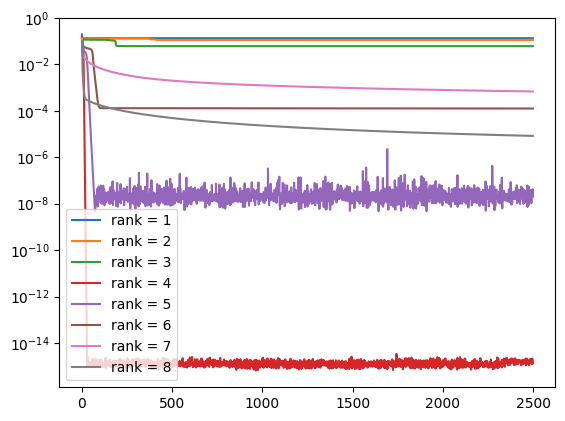

In [46]:
for i in range(0, 8):
    plt.plot(all_errs[i], label=f'rank = {i + 1}')
plt.yscale('log')
plt.legend()
plt.show()